In [6]:
library(tidyverse)
install.packages("janitor")
library(janitor)
library(repr)
library(tidymodels)

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.2     ✔ rsample      1.1.1
✔ dials        1.1.0     ✔ tune         1.0.1
✔ infer        1.0.4     ✔ workflows    1.1.2
✔ modeldata    1.0.1     ✔ workflowsets 1.0.0
✔ parsnip      1.0.3     ✔ yardstick    1.1.0
✔ recipes      1.0.4     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks readr::spec()
✖ recipes::step()   masks stats::step()
• Learn how to get started at https://www.tidymodels.org/start/



Hello

In [27]:
data <- read_csv("https://raw.githubusercontent.com/lukeelliotchan/dsci100_grp35/main/player_stats.csv") |>
    clean_names() |>
    select(current_rank, current_elo_rank, prize_money, age)
data_cleaned <- data |>
    separate(current_rank, c("current_rank", "points"), " ") |>
    separate(current_elo_rank, c("current_elo_rank", "current_elo"), " ") |>
    separate(age, c("age", "dob"), " ") |>
    #as.numeric(gsub("$", "\\1"))
    separate(prize_money, c("dollar", "prize_money"), "\\$") |>
    separate(prize_money, c("prize_money", "temp"), "  ") |>
    mutate(current_rank = as.numeric(current_rank)) |> #turn the columns into numbers |>
    mutate(prize_money = as.numeric(gsub(",", "", prize_money))) |> #rows that dont meet condition of becoming number are just NA, fix later?
    mutate(current_elo_rank = gsub("\\(", "", current_elo_rank)) |>
    mutate(current_elo_rank = as.numeric(gsub("\\)","", current_elo_rank)))   |>                                      
    mutate(age = as.numeric(age)) |>
    select(current_rank, current_elo_rank, prize_money, age)
data_cleaned
data_split <- initial_split(data_cleaned, prop = 0.75, strata = prize_money)
data_training <- training(data_split)
data_testing <- testing(data_split)

New names:
• `` -> `...1`
Rows: 500 Columns: 38
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (25): Age, Country, Plays, Wikipedia, Current Rank, Best Rank, Name, Bac...
dbl (13): ...1, Turned Pro, Seasons, Titles, Best Season, Retired, Masters, ...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Warning message:
“Expected 2 pieces. Additional pieces discarded in 2 rows [146, 441].”
Warning message:
“Expected 2 pieces. Missing pieces filled with `NA` in 412 rows [2, 3, 4, 5, 6,
7, 8, 9, 10, 11, 12, 13, 14, 15, 18, 19, 20, 21, 22, 23, ...].”
Warning message:
“There was 1 warning in `mutate()`.
ℹ In argument: `prize_money = as.numeric(gsub(",", "", prize_money))`.
Caused by warning:
! NAs introduced by coercion”


current_rank,current_elo_rank,prize_money,age
<dbl>,<dbl>,<dbl>,<dbl>
378,NA,NA,26
326,NA,59040,18
178,144,3261567,32
236,NA,374093,21
183,100,6091971,27
31,33,1517157,22
307,NA,278709,28
232,NA,59123,21
417,189,122734,25


Warning message:
“Removed 73 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 74 rows containing missing values (`geom_point()`).”


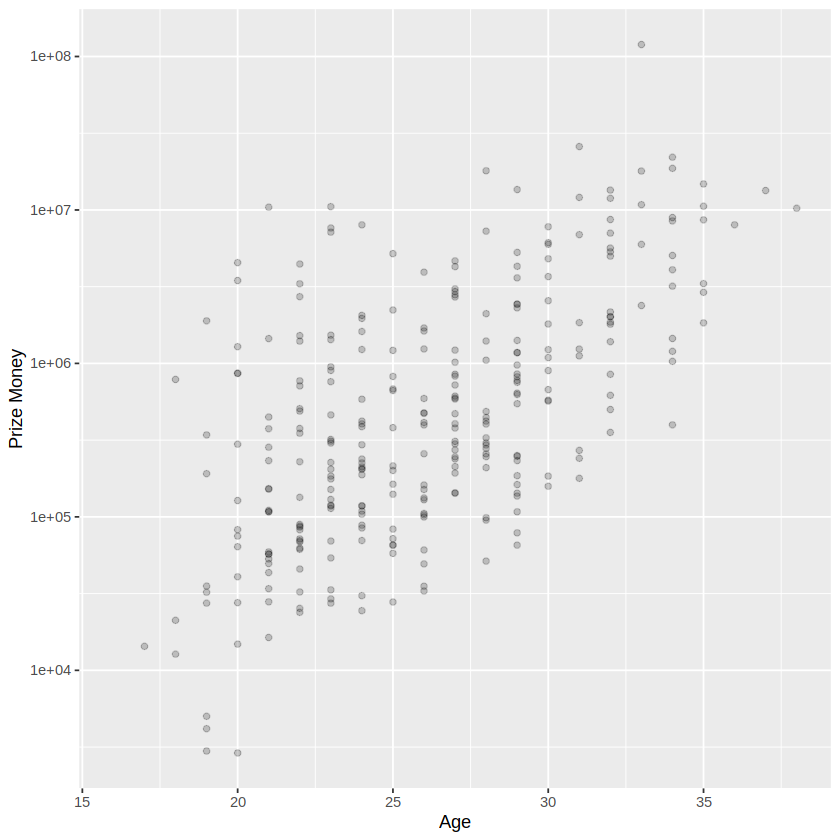

Warning message:
“Removed 258 rows containing missing values (`geom_point()`).”


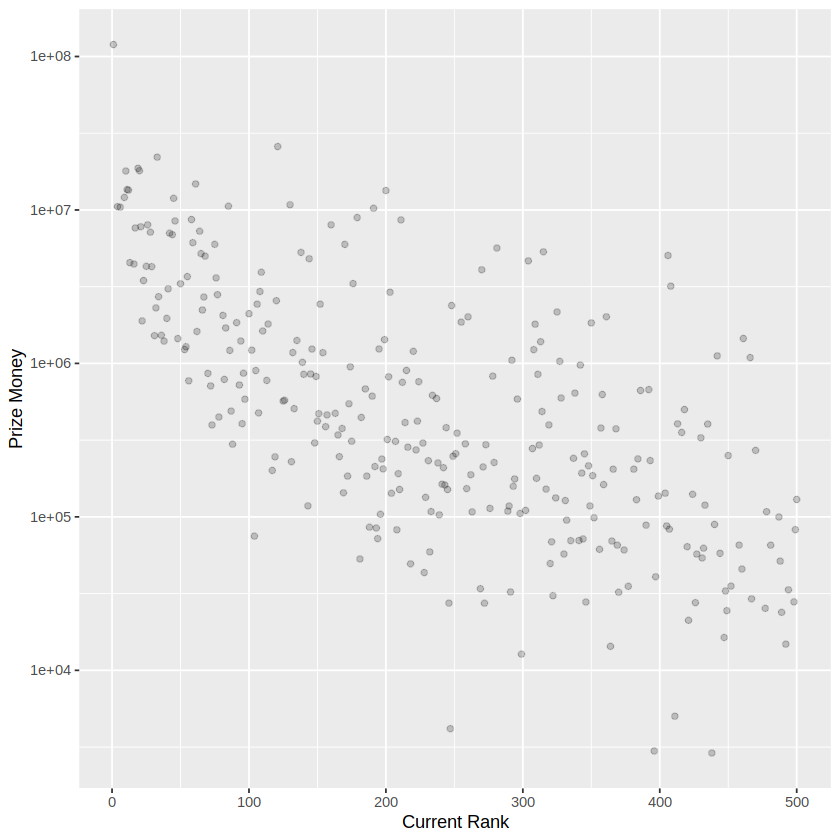

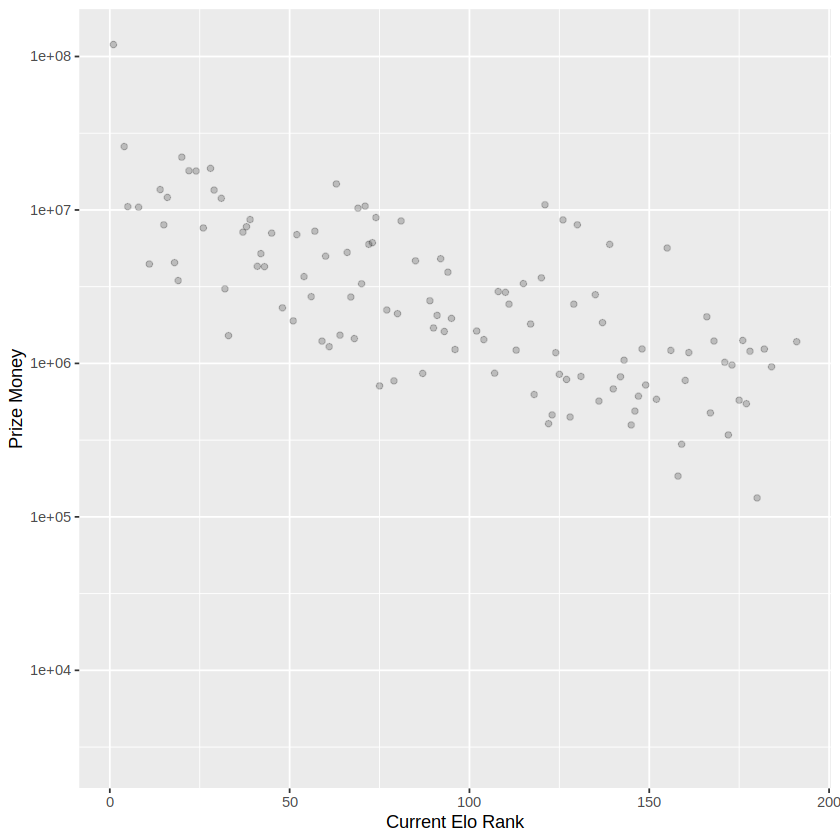

In [32]:
data_plot_1 <- data_training |>
    ggplot(aes(x=age, y= prize_money))+
    geom_point(alpha=0.2)+
    labs(x="Age", y= "Prize Money") +
    scale_y_log10()
data_plot_1
data_plot_2 <- data_training |>
    ggplot(aes(x=current_rank, y= prize_money))+
    geom_point(alpha=0.2)+
    labs(x="Current Rank", y= "Prize Money") +
    scale_y_log10()
data_plot_2
data_plot_3 <- data_training |>
    ggplot(aes(x=current_elo_rank, y= prize_money))+
    geom_point(alpha=0.2)+
    labs(x="Current Elo Rank", y= "Prize Money") +
    scale_y_log10()
data_plot_3